# Text Classification Assessment 

### Goal: Given a set of text movie reviews that have been labeled negative or positive

For more information on this dataset visit http://ai.stanford.edu/~amaas/data/sentiment/

**Task: Perform imports and load the dataset into a pandas DataFrame**
For this project the dataset from `'../DATA/moviereviews.csv'`.

In [126]:
# CODE HERE

In [127]:
import numpy as np
import pandas as pd

In [128]:
df = pd.read_csv('../DATA/moviereviews.csv')

In [129]:
df.head()

,label,review
0,neg,how do films like mouse hunt get into theatres...
1,neg,some talented actresses are blessed with a dem...
2,pos,this has been an extraordinary year for austra...
3,pos,according to hollywood movies made in last few...
4,neg,my first press screening of 1998 and already i...


**TASK: Check to see if there are any missing values in the dataframe.**

In [130]:
df.isnull().sum()

label      0
review    35
dtype: int64

**TASK: Remove any reviews that are NaN**

In [131]:
df = df.dropna()

**TASK: Check to see if any reviews are blank strings and not just NaN. Note: This means a review text could just be: "" or "  " or some other larger blank string. How would you check for this? Note: There are many ways! Once you've discovered the reviews that are blank strings, go ahead and remove them as well. [Click me for a big hint](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.str.isspace.html)**

In [132]:
df['review'].str.isspace().sum()

27

In [133]:
df['review'].str.isspace()

0       False
1       False
2       False
3       False
4       False
        ...  
1995    False
1996    False
1997    False
1998    False
1999    False
Name: review, Length: 1965, dtype: bool

In [134]:
df[df['review'].str.isspace()]

,label,review
57,neg,
71,pos,
147,pos,
151,pos,
283,pos,
307,pos,
313,neg,
323,pos,
343,pos,
351,neg,


In [135]:
df = df[~df['review'].str.isspace()]

In [136]:
df['review'].apply(lambda review: review == '').sum()

0

**TASK: Confirm the value counts per label:**

In [137]:
#CODE HERE
df['label'].unique()

array(['neg', 'pos'], dtype=object)

In [138]:
df['label'].value_counts()

neg    969
pos    969
Name: label, dtype: int64

In [139]:
#CODE HERE
X = df['review']
y=df['label']

In [142]:
#CODE HERE
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
tf_idf=TfidfVectorizer(stop_words='english')

In [143]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=101)
X_train_tfidf=tf_idf.fit_transform(X_train)
X_test_tfidf = tf_idf.transform(X_test)

### Training a Mode

**TASK: Create a PipeLine that will both create a TF-IDF Vector out of the raw text data and fit a supervised learning model of my choice. Then fit that pipeline on the training data.**

In [144]:
#CODE HERE
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC,SVC

In [145]:
nb= MultinomialNB()
log_model = LogisticRegression(max_iter=10000)
l_svc= LinearSVC()
svc= SVC()
models = [nb,log_model,l_svc,svc]

In [146]:
for model in models:
    model.fit(X_train_tfidf,y_train)

**TASK: Create a classification report and plot a confusion matrix based on the results of  PipeLine.**

In [147]:
#CODE HERE
from sklearn.metrics import classification_report,plot_confusion_matrix

              precision    recall  f1-score   support

         neg       0.78      0.87      0.82       191
         pos       0.86      0.76      0.80       197

    accuracy                           0.81       388
   macro avg       0.82      0.81      0.81       388
weighted avg       0.82      0.81      0.81       388

              precision    recall  f1-score   support

         neg       0.80      0.85      0.83       191
         pos       0.85      0.79      0.82       197

    accuracy                           0.82       388
   macro avg       0.82      0.82      0.82       388
weighted avg       0.82      0.82      0.82       388

              precision    recall  f1-score   support

         neg       0.81      0.84      0.82       191
         pos       0.84      0.81      0.82       197

    accuracy                           0.82       388
   macro avg       0.82      0.82      0.82       388
weighted avg       0.83      0.82      0.82       388

              preci

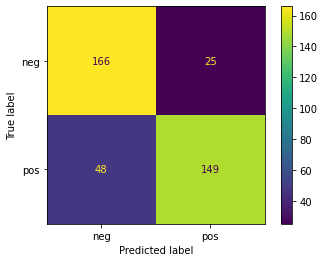

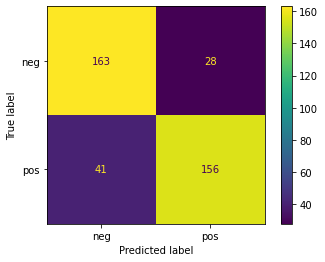

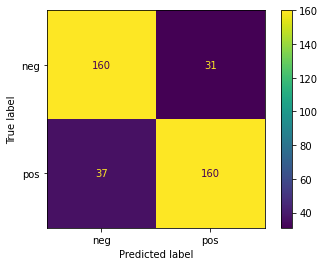

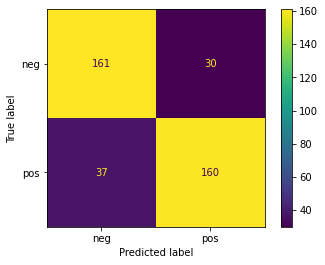

In [148]:
for model in models:
    pred= model.predict(X_test_tfidf)
    print(classification_report(y_test,pred))
    plot_confusion_matrix(model,X_test_tfidf,y_test)

In [149]:
# Linear SVC and SVC perfomrs same and better than other models, So now I will be tune the parameters of Linear SVC model

In [166]:
from sklearn.model_selection import GridSearchCV

In [159]:
param_grid = {'penalty':['l2'],
              'C':[5],
              'max_iter':[100]}
grid_model = GridSearchCV(l_svc,param_grid)
grid_model.fit(X_train_tfidf,y_train)

C:\Users\knock\anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\knock\anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\knock\anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\knock\anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\knock\anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations

GridSearchCV(estimator=LinearSVC(),
             param_grid={'C': [5], 'max_iter': [100], 'penalty': ['l2']})

In [157]:
predsx=grid_model.predict(X_test_tfidf)
print(classification_report(y_test,predsx))
grid_model.best_params_

              precision    recall  f1-score   support

         neg       0.82      0.84      0.83       191
         pos       0.84      0.82      0.83       197

    accuracy                           0.83       388
   macro avg       0.83      0.83      0.83       388
weighted avg       0.83      0.83      0.83       388



{'C': 5,
 'loss': 'squared_hinge',
 'max_iter': 100,
 'multi_class': 'ovr',
 'penalty': 'l2'}

In [160]:
from sklearn.pipeline import Pipeline
pipe = Pipeline([('tf_idf',tf_idf),
                 ('grid_model',grid_model)])
pipe.fit(X,y)

C:\Users\knock\anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\knock\anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\knock\anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\knock\anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\knock\anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations

Pipeline(steps=[('tf_idf', TfidfVectorizer(stop_words='english')),
                ('grid_model',
                 GridSearchCV(estimator=LinearSVC(),
                              param_grid={'C': [5], 'max_iter': [100],
                                          'penalty': ['l2']}))])

In [162]:
pipe.predict(['I guess the movie did not win my mind'])

array(['neg'], dtype=object)

In [165]:
pipe.predict(['as far as storyline goes, the movie was enjoyable'])

array(['pos'], dtype=object)

#Thank you